In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

In [ ]:
# Generate synthetic dataset
X, Y = make_classification(n_samples=1000, n_features=20, n_classes=5, n_clusters_per_class=1, n_redundant=0, n_informative=15, random_state=42)

print(f'Input:{X}')
print(f'Output: {Y}')

Input:[[-0.33946745 -2.84888078  2.80860338 ...  0.40472481 -1.30607922
   0.10364801]
 [ 0.79286969  1.52521037  0.60489322 ...  2.10677879  1.23069704
  -0.57600456]
 [-0.36594825  1.80379441 -0.49832409 ...  0.31198969  0.70774117
   2.59318038]
 ...
 [-0.1061174   2.51480944  0.18897536 ...  1.18621331 -0.70228674
   5.1259836 ]
 [ 1.81512262 -1.1963165  -1.89692632 ...  0.37970641 -1.84073473
  -1.47847668]
 [ 0.53193467 -1.71362357 -5.19506562 ...  0.44371682 -0.6590307
  -4.79334796]]
Output: [2 3 1 0 2 1 4 2 3 2 0 3 1 2 2 3 1 4 2 2 0 0 3 2 2 4 2 1 2 0 0 4 2 1 3 4 0
 4 0 2 3 4 0 0 1 4 3 2 3 4 3 1 1 2 0 2 0 1 1 1 0 3 2 2 1 3 3 0 4 0 3 1 1 2
 2 0 4 4 3 0 0 3 1 2 0 0 0 1 0 4 1 2 4 1 0 4 1 1 1 2 2 4 3 4 1 1 3 2 4 0 3
 0 0 0 1 2 4 1 2 3 2 1 3 4 0 1 4 0 0 0 4 4 4 4 3 0 2 4 2 4 2 3 0 0 2 4 3 0
 0 3 4 1 3 4 1 1 1 3 3 1 3 4 3 1 4 4 1 1 0 4 2 1 4 1 4 1 1 4 2 4 4 1 3 1 2
 1 1 4 4 2 0 2 0 1 4 4 3 1 4 1 4 1 3 1 3 0 2 3 3 1 4 4 2 2 1 4 1 4 2 0 0 0
 0 0 4 4 1 3 0 2 0 2 1 2 2 3 1 3 1 3 0 3 2 3 

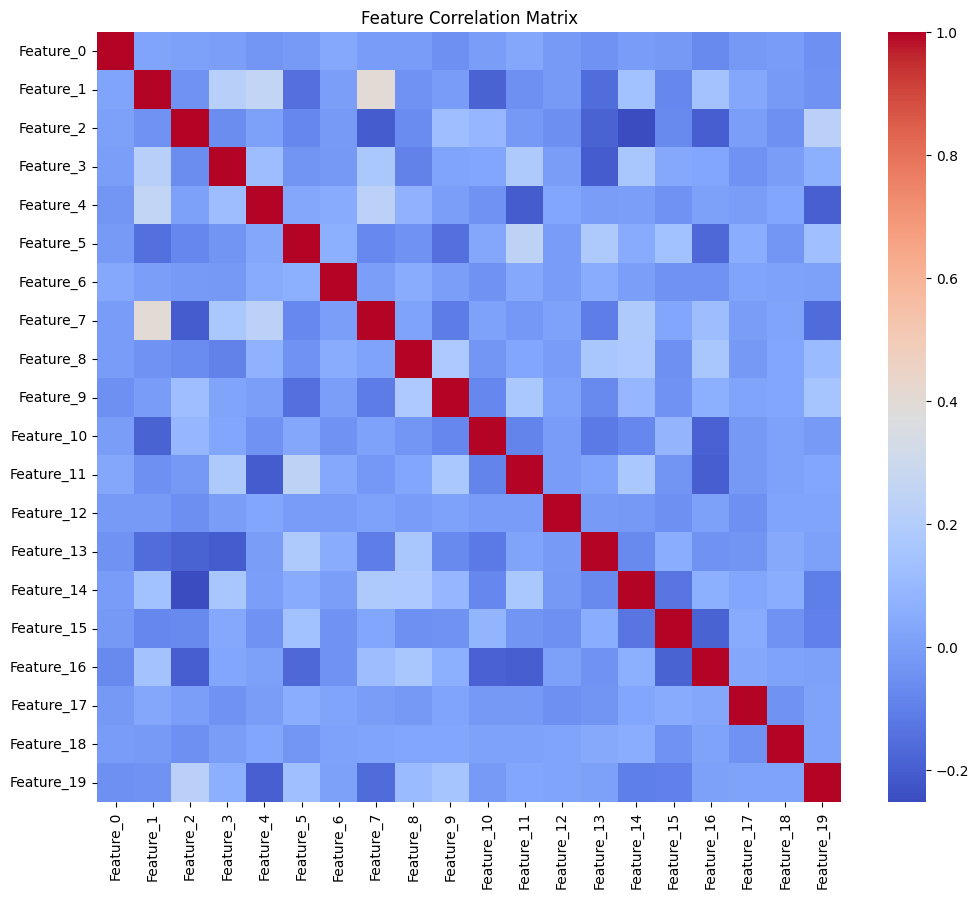

In [ ]:
# Create a DataFrame for the heatmap
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])

# Compute the correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

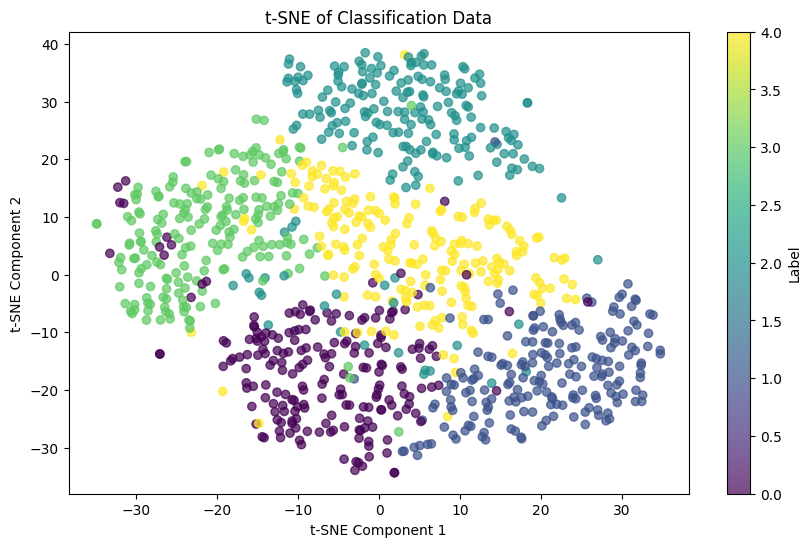

In [ ]:
import matplotlib.pyplot as plt
# Reducing to 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap='viridis', alpha=0.7)
plt.colorbar(label='Label')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Classification Data')
plt.show()

In [ ]:
# One-hot encode labels
encoder = OneHotEncoder(sparse=False)
Y = encoder.fit_transform(Y.reshape(-1, 1))

# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
print(f'Input:{X}')
print(f'Output: {Y}')

Input:[[-0.33946745 -2.84888078  2.80860338 ...  0.40472481 -1.30607922
   0.10364801]
 [ 0.79286969  1.52521037  0.60489322 ...  2.10677879  1.23069704
  -0.57600456]
 [-0.36594825  1.80379441 -0.49832409 ...  0.31198969  0.70774117
   2.59318038]
 ...
 [-0.1061174   2.51480944  0.18897536 ...  1.18621331 -0.70228674
   5.1259836 ]
 [ 1.81512262 -1.1963165  -1.89692632 ...  0.37970641 -1.84073473
  -1.47847668]
 [ 0.53193467 -1.71362357 -5.19506562 ...  0.44371682 -0.6590307
  -4.79334796]]
Output: [[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [ ]:
#np.set_printoptions(threshold=np.inf)

In [ ]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 20  # Input features
        hiddenLayerNeurons1 = 64
        hiddenLayerNeurons2 = 32
        hiddenLayerNeurons3 = 16
        outLayerNeurons = 5    # Number of classes

        self.learning_rate = 0.01
        self.W_H1 = np.random.randn(inputLayerNeurons, hiddenLayerNeurons1)
        self.W_H2 = np.random.randn(hiddenLayerNeurons1, hiddenLayerNeurons2)
        self.W_H3 = np.random.randn(hiddenLayerNeurons2, hiddenLayerNeurons3)
        self.W_O = np.random.randn(hiddenLayerNeurons3, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        p = y_pred
        log_likelihood = -np.log(p[range(m), np.argmax(y_true, axis=1)])
        loss = np.sum(log_likelihood) / m
        return loss

    def feedForward(self, X):
        self.hidden_output1 = self.sigmoid(np.dot(X, self.W_H1))
        self.hidden_output2 = self.sigmoid(np.dot(self.hidden_output1, self.W_H2))
        self.hidden_output3 = self.sigmoid(np.dot(self.hidden_output2, self.W_H3))
        output_input = np.dot(self.hidden_output3, self.W_O)
        self.output = self.softmax(output_input)
        return self.output

    def backPropagation(self, X, Y, pred):
        m = Y.shape[0]

        # Calculate gradients
        output_error = pred - Y
        output_delta = output_error / m

        hidden_error3 = output_delta.dot(self.W_O.T)
        hidden_delta3 = hidden_error3 * self.sigmoid(self.hidden_output3, der=True)

        hidden_error2 = hidden_delta3.dot(self.W_H3.T)
        hidden_delta2 = hidden_error2 * self.sigmoid(self.hidden_output2, der=True)

        hidden_error1 = hidden_delta2.dot(self.W_H2.T)
        hidden_delta1 = hidden_error1 * self.sigmoid(self.hidden_output1, der=True)

        # Update weights
        self.W_O -= self.learning_rate * self.hidden_output3.T.dot(output_delta)
        self.W_H3 -= self.learning_rate * self.hidden_output2.T.dot(hidden_delta3)
        self.W_H2 -= self.learning_rate * self.hidden_output1.T.dot(hidden_delta2)
        self.W_H1 -= self.learning_rate * X.T.dot(hidden_delta1)

    def train(self, X, Y, epochs=20000):
        err_list = []
        for epoch in range(epochs):
            pred = self.feedForward(X)
            self.backPropagation(X, Y, pred)
            loss = self.cross_entropy_loss(Y, pred)
            if epoch % 1000 == 0:
                err_list.append(loss)
                print(f'Epoch {epoch}, Loss: {loss}')
        plt.plot(err_list)
        plt.show()

    def predict(self, X):
        pred = self.feedForward(X)
        return np.argmax(pred, axis=1)


Epoch 0, Loss: 2.0973843718412106
Epoch 1000, Loss: 1.3196900540916925
Epoch 2000, Loss: 1.1064057389612256
Epoch 3000, Loss: 0.9285385801324874
Epoch 4000, Loss: 0.7818320370113692
Epoch 5000, Loss: 0.6684015678177146
Epoch 6000, Loss: 0.5817939749388996
Epoch 7000, Loss: 0.5138710911427756
Epoch 8000, Loss: 0.45925663434812974
Epoch 9000, Loss: 0.4141052887826615
Epoch 10000, Loss: 0.3757220157922226
Epoch 11000, Loss: 0.3423043486913806
Epoch 12000, Loss: 0.3126769839168023
Epoch 13000, Loss: 0.28614336912477045
Epoch 14000, Loss: 0.26224440914654557
Epoch 15000, Loss: 0.2406312359233644
Epoch 16000, Loss: 0.2210156415313474
Epoch 17000, Loss: 0.20315771166048044
Epoch 18000, Loss: 0.18689025536535783
Epoch 19000, Loss: 0.17215437527428015


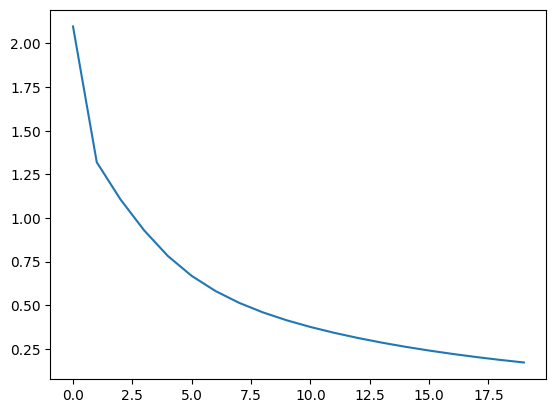

Training Accuracy: 0.9725
Test Accuracy: 0.795
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81        44
           1       0.85      0.82      0.84        34
           2       0.84      0.79      0.81        52
           3       0.76      0.78      0.77        37
           4       0.73      0.73      0.73        33

    accuracy                           0.80       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.80      0.80      0.80       200

Confusion Matrix:
[[37  2  1  0  4]
 [ 2 28  2  0  2]
 [ 2  0 41  6  3]
 [ 4  1  3 29  0]
 [ 2  2  2  3 24]]


In [ ]:
NN = NeuralNetwork()
#NN = NeuralNetwork(activation_type ='tanh')
#NN = NeuralNetwork(activation_type = 'gaussian')
#NN = NeuralNetwork(activation_type = 'relu')
NN.train(X_train, Y_train)

# Predictions
train_predictions = NN.predict(X_train)
test_predictions = NN.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

train_accuracy = accuracy_score(np.argmax(Y_train, axis=1), train_predictions)
test_accuracy = accuracy_score(np.argmax(Y_test, axis=1), test_predictions)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

print("Classification Report on Test Set:")
print(classification_report(np.argmax(Y_test, axis=1), test_predictions))

print("Confusion Matrix:")
print(confusion_matrix(np.argmax(Y_test, axis=1), test_predictions))


In [ ]:
input_data = np.array([-3.3946745, -2.84888078,  2.808603, -7.19786, -4.2754,  7.96877, -1.2712, -1.48187, -4.10588,  3.918323, -1.25374,  1.2748662, -6.84099, -3.150453, -1.729752,  1.151189, -5.981176,  4.047248, -1.306079,  1.036481])
input_data = input_data.reshape(1, -1)  # Reshape to (1, number_of_features)

# Feed the reshaped input to the network
output = NN.feedForward(input_data)
print(output)

[[4.49983662e-04 1.04611995e-02 6.85275600e-01 1.72565865e-02
  2.86556631e-01]]
